We have a Train.csv dataset with characteristics of accommodation and rental prices wich consist of 3013 records at our disposal. Based on this data we need to choose and train a model for the optimal nightly rent price of 618 accommodation offers from Submission.csv dataset

# Load in Data for model train

In [1]:
#Importing the required packages into our environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Importing the rent price data

data = pd.read_csv('Train.csv')
df = pd.DataFrame(data)

df.head(5)

,name,summary,description,neighborhood_overview,transit,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,Guest Quarters on Capitol Hill,The Guest Quarters on Capitol Hill is a garde...,The Guest Quarters on Capitol Hill is a garde...,the convenience and charm of being on Capitol ...,The Red Line and the Blue Line Metros are with...,2013-08-14,"Washington, District of Columbia, United States",We are a reservation service for many DC area ...,98%,52%,...,10.0,10.0,10.0,10.0,10.0,8.0,f,strict,41,0.18
1,Private oasis. Top floor w/ 2 decks,"Top two floors, two bathrooms and two decks. M...","Top two floors, two bathrooms and two decks. M...",Adams Morgan is the most vibrant part of DC wh...,There is so many transportation options. Acros...,2012-01-23,"Washington, District of Columbia, United States","I have lived in DC for that past five years, b...",100%,100%,...,9.0,9.0,10.0,9.0,10.0,9.0,f,strict,1,0.41
2,People's Place -Convention Center,NaN,This 2 bedroom apartment is on the ground floo...,NaN,NaN,2009-10-31,"Berkeley, California, United States",A professional photo editor and photographer l...,97%,100%,...,8.0,8.0,9.0,9.0,9.0,9.0,f,strict,3,1.09
3,M St Apt C,"Inspired by MidEast styles. 1 full bed, 1 air ...","Inspired by MidEast styles. 1 full bed, 1 air ...",I love this neighborhood! Mt. Vernon is the ve...,The Mt. Vernon Sq metro is just 2 blocks away ...,2013-04-23,"San Francisco, California, United States","I am from Oakland, California and I like to li...",92%,100%,...,9.0,8.0,8.0,8.0,9.0,9.0,f,flexible,4,4.34
4,Columbia Heights Rm w/Private Bath,Enjoy our dressed up guest room in the heart o...,Enjoy our dressed up guest room in the heart o...,NaN,NaN,2012-07-09,"Washington, District of Columbia, United States",I'm a tree-hugger at heart. My wife is an arti...,100%,75%,...,9.0,9.0,10.0,10.0,8.0,9.0,f,moderate,3,0.09


# Data Preparation

Train.csv dataset contains various features and information about of the each housing supply. Not all information we can convert to numeric for train our model and not all information will affect its rental cost. The name does not affect the cost for example. There's no way we can use accommodation description for train our model etc.

Create dataframe with the necessary columns:

In [2]:
df1 = df.drop(columns= ['name', 'summary', 'description', 'neighborhood_overview', 'transit', 'host_location', 'host_about', 'host_neighbourhood', 'host_verifications', 
'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'amenities'])
df1.head(5)

,host_since,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,2013-08-14,98%,52%,"Union Station, Stanton Park, Kingman Park",20002,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,8.0,f,strict,41,0.18
1,2012-01-23,100%,100%,"Kalorama Heights, Adams Morgan, Lanier Heights",20009,Apartment,Entire home/apt,2,1.5,1.0,...,9.0,9.0,10.0,9.0,10.0,9.0,f,strict,1,0.41
2,2009-10-31,97%,100%,"Shaw, Logan Circle",20001,Apartment,Entire home/apt,6,1.0,2.0,...,8.0,8.0,9.0,9.0,9.0,9.0,f,strict,3,1.09
3,2013-04-23,92%,100%,"Shaw, Logan Circle",20001,Apartment,Entire home/apt,3,1.0,0.0,...,9.0,8.0,8.0,8.0,9.0,9.0,f,flexible,4,4.34
4,2012-07-09,100%,75%,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",20001,House,Private room,2,1.0,1.0,...,9.0,9.0,10.0,10.0,8.0,9.0,f,moderate,3,0.09


###   Clean and convert values

'host_since' column contains date data in year-month-day format. We will use only year host since in our model.

In [3]:
df1['host_since'] = pd.to_datetime(df1['host_since'])
df1['host_since_year'] = df1['host_since'].dt.year
df1 = df1.drop(columns = ['host_since'])
df1.to_csv("df1.csv", index=False)
df1.head(5)

,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_since_year
0,98%,52%,"Union Station, Stanton Park, Kingman Park",20002,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,10.0,10.0,10.0,10.0,8.0,f,strict,41,0.18,2013
1,100%,100%,"Kalorama Heights, Adams Morgan, Lanier Heights",20009,Apartment,Entire home/apt,2,1.5,1.0,1.0,...,9.0,10.0,9.0,10.0,9.0,f,strict,1,0.41,2012
2,97%,100%,"Shaw, Logan Circle",20001,Apartment,Entire home/apt,6,1.0,2.0,3.0,...,8.0,9.0,9.0,9.0,9.0,f,strict,3,1.09,2009
3,92%,100%,"Shaw, Logan Circle",20001,Apartment,Entire home/apt,3,1.0,0.0,2.0,...,8.0,8.0,8.0,9.0,9.0,f,flexible,4,4.34,2013
4,100%,75%,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",20001,House,Private room,2,1.0,1.0,1.0,...,9.0,10.0,10.0,8.0,9.0,f,moderate,3,0.09,2012


***
Clear string values from extra characters and join values in each cell in one word.

In [4]:
df1['neighbourhood_cleansed'].value_counts()

Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                           372
Dupont Circle, Connecticut Avenue/K Street                                                           292
Union Station, Stanton Park, Kingman Park                                                            242
Capitol Hill, Lincoln Park                                                                           239
Shaw, Logan Circle                                                                                   230
Edgewood, Bloomingdale, Truxton Circle, Eckington                                                    197
Kalorama Heights, Adams Morgan, Lanier Heights                                                       195
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street                        152
Brightwood Park, Crestwood, Petworth                                                                 135
West End, Foggy Bottom, GWU                            

In [5]:
df1['neighbourhood_cleansed'] = df1['neighbourhood_cleansed'].str.replace("\ |\/","_", regex=True)
df1['neighbourhood_cleansed'] = df1['neighbourhood_cleansed'].str.replace("\.|\,","",  regex=True)

df1['neighbourhood_cleansed'].value_counts()

Columbia_Heights_Mt_Pleasant_Pleasant_Plains_Park_View                                          372
Dupont_Circle_Connecticut_Avenue_K_Street                                                       292
Union_Station_Stanton_Park_Kingman_Park                                                         242
Capitol_Hill_Lincoln_Park                                                                       239
Shaw_Logan_Circle                                                                               230
Edgewood_Bloomingdale_Truxton_Circle_Eckington                                                  197
Kalorama_Heights_Adams_Morgan_Lanier_Heights                                                    195
Downtown_Chinatown_Penn_Quarters_Mount_Vernon_Square_North_Capitol_Street                       152
Brightwood_Park_Crestwood_Petworth                                                              135
West_End_Foggy_Bottom_GWU                                                                       119


In [6]:
df1['property_type'].value_counts()

Apartment          1853
House               950
Condominium          69
Townhouse            61
Bed & Breakfast      44
Loft                 19
Other                10
Boat                  2
Dorm                  2
Cabin                 1
Bungalow              1
Name: property_type, dtype: int64

In [7]:
df1['property_type'] = df1['property_type'].str.replace(" ","_")
df1['property_type'].value_counts()

Apartment          1853
House               950
Condominium          69
Townhouse            61
Bed_&_Breakfast      44
Loft                 19
Other                10
Boat                  2
Dorm                  2
Cabin                 1
Bungalow              1
Name: property_type, dtype: int64

In [8]:
df1['room_type'].value_counts()

Entire home/apt    1968
Private room        964
Shared room          81
Name: room_type, dtype: int64

In [9]:
df1['room_type'] = df1['room_type'].str.replace("\ |\/","_", regex=True)
df1['room_type'].value_counts()

Entire_home_apt    1968
Private_room        964
Shared_room          81
Name: room_type, dtype: int64

In [10]:
df1['bed_type'].value_counts()

Real Bed         2890
Futon              47
Pull-out Sofa      36
Airbed             31
Couch               9
Name: bed_type, dtype: int64

In [11]:
df1['bed_type'] = df1['bed_type'].str.replace("\ |\-","_", regex=True)
df1['bed_type'].value_counts()

Real_Bed         2890
Futon              47
Pull_out_Sofa      36
Airbed             31
Couch               9
Name: bed_type, dtype: int64

In [12]:
df1['instant_bookable'].value_counts()

f    2697
t     316
Name: instant_bookable, dtype: int64

In [13]:
df1['cancellation_policy'].value_counts()

flexible           1093
strict              978
moderate            889
super_strict_30      53
Name: cancellation_policy, dtype: int64

Clean percentage and  monetary values from signs.

In [14]:
df1['host_response_rate'] = df1['host_response_rate'].str.replace("%","", regex=True)
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.replace("%","", regex=True)
df1['price'] = df1['price'].str.replace("$","", regex=True)
df1['price'] = df1['price'].str.replace(",","", regex=True)
df1['cleaning_fee'] = df1['cleaning_fee'].str.replace("$","", regex=True)

***

Check if there are any null values in our dataset.

In [15]:
print(df1.isnull().sum())

host_response_rate                 349
host_acceptance_rate               493
neighbourhood_cleansed               0
zipcode                              8
property_type                        1
room_type                            0
accommodates                         0
bathrooms                           25
bedrooms                            13
beds                                10
bed_type                             0
price                                0
cleaning_fee                      1127
guests_included                      0
minimum_nights                       0
maximum_nights                       0
number_of_reviews                    0
review_scores_rating               703
review_scores_accuracy             706
review_scores_cleanliness          707
review_scores_checkin              707
review_scores_communication        704
review_scores_location             704
review_scores_value                704
instant_bookable                     0
cancellation_policy      

***

We have a small number of null values in zipcode so let's delete those rows from dataframe.

Null values in host_response_rate, host_acceptance_rate, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, reviews_per_month we can replace by 0 because it is clearly possible that rating simply not formed for these proposals. Fresh proposals with no reviews for example.

Null values in bedrooms and bathrooms we will also replace with 0 because it could be a private rooms without separate bathrooms.

Null values in cleaning_fee we will replace with 0 too because it possible that cleaning fee is not charging.

Null values in beds we will replace with 0 because it possible that accommodation has no beds.

In [16]:
df1 = df1.dropna(subset=['property_type', 'zipcode'])
df1 = df1.fillna(value={'host_response_rate': 0, 'host_acceptance_rate': 0, 'bathrooms': 0, 'bedrooms': 0, 'beds': 0, 'cleaning_fee': 0, 'review_scores_rating': 0, 'review_scores_accuracy': 0, 'review_scores_cleanliness': 0, 'review_scores_checkin': 0, 'review_scores_communication': 0, 'review_scores_location': 0, 'review_scores_value': 0, 'reviews_per_month': 0})

print(df1.isnull().sum())

host_response_rate                0
host_acceptance_rate              0
neighbourhood_cleansed            0
zipcode                           0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
price                             0
cleaning_fee                      0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
instant_bookable                  0
cancellation_policy               0
calculated_host_listings_count    0
reviews_per_month           

***

Check what values and in what quantity contains zipcode.

In [17]:
df1['zipcode'].value_counts()

20009         593
20002         417
20001         408
20010         220
20003         217
20011         150
20007         141
20005         135
20037         117
20008         105
20017          75
20020          65
20024          64
20016          56
20036          52
20018          43
20012          34
20019          29
20015          22
20006          14
20032          12
20910           6
20912           5
20712           5
20052           4
20004           4
20064           3
20002-6645      1
22209           1
20007-3413      1
20001-4044      1
20268           1
20229           1
20782           1
21403           1
Name: zipcode, dtype: int64

***

Some rows contain ZIP Code 5 Plus 4. Replace their values with values ZIP Code 5.

In [18]:
df1.zipcode = df1.zipcode.replace('20002-6645', '20002')
df1.zipcode = df1.zipcode.replace('20007-3413', '20007')
df1.zipcode = df1.zipcode.replace('20001-4044', '20001')

In [19]:
df1['zipcode'].value_counts()

20009    593
20002    418
20001    409
20010    220
20003    217
20011    150
20007    142
20005    135
20037    117
20008    105
20017     75
20020     65
20024     64
20016     56
20036     52
20018     43
20012     34
20019     29
20015     22
20006     14
20032     12
20910      6
20912      5
20712      5
20052      4
20004      4
20064      3
20782      1
20229      1
20268      1
22209      1
21403      1
Name: zipcode, dtype: int64

***
Convert quantitative variables to integer type.

In [20]:
print(df1.dtypes)

host_response_rate                 object
host_acceptance_rate               object
neighbourhood_cleansed             object
zipcode                            object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
price                              object
cleaning_fee                       object
guests_included                     int64
minimum_nights                      int64
maximum_nights                      int64
number_of_reviews                   int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               

In [21]:
cols = ['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms', 'beds', 'price', 'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce')
df1[cols] = df1[cols].astype('int64')

print(df1.dtypes)

host_response_rate                 int64
host_acceptance_rate               int64
neighbourhood_cleansed            object
zipcode                           object
property_type                     object
room_type                         object
accommodates                       int64
bathrooms                          int64
bedrooms                           int64
beds                               int64
bed_type                          object
price                              int64
cleaning_fee                       int64
guests_included                    int64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
review_scores_rating               int64
review_scores_accuracy             int64
review_scores_cleanliness          int64
review_scores_checkin              int64
review_scores_communication        int64
review_scores_location             int64
review_scores_value                int64
instant_bookable

***
Check correlations among columns by visualizing the correlation matrix as a heatmap.

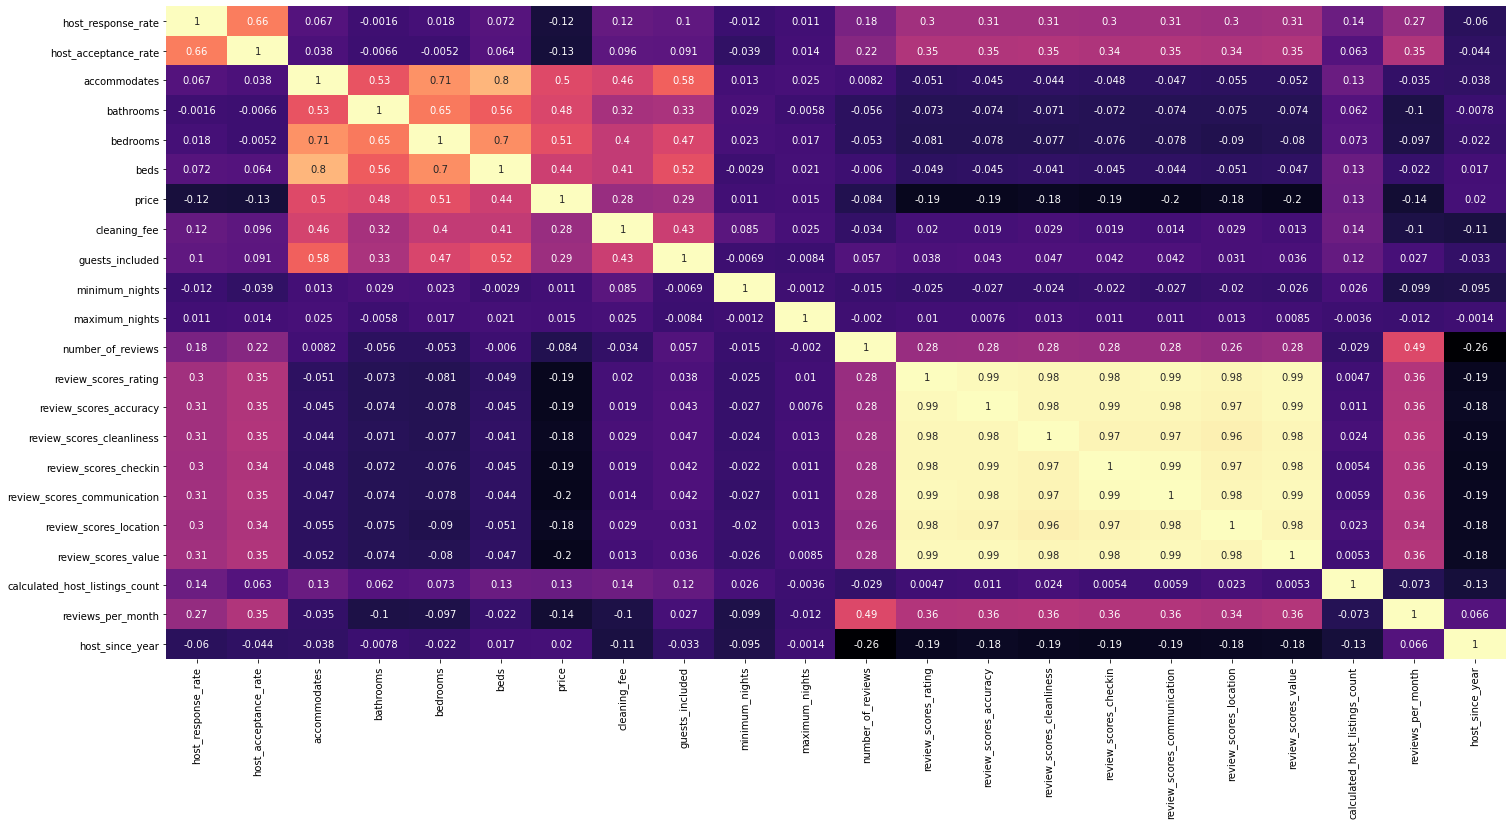

In [22]:
plt.figure(figsize=(24, 12))
sb.heatmap(df1.corr(), annot = True, cbar=False, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

We can see that 'bedrooms' and 'bed' is highly correlated with 'accomodates' and 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value' - with 'review_scores_rating'.

So we drop 'bedrooms', 'bed', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value' columns from our dataframe.

In [55]:
df3 = df1.drop(columns=['bedrooms', 'beds', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])

***
Let's see at the prices and trying to find and understand an outliers.

In [56]:
df3.price.describe()

count    3004.000000
mean      150.573236
std       147.503414
min        10.000000
25%        85.000000
50%       115.000000
75%       165.500000
max      2822.000000
Name: price, dtype: float64

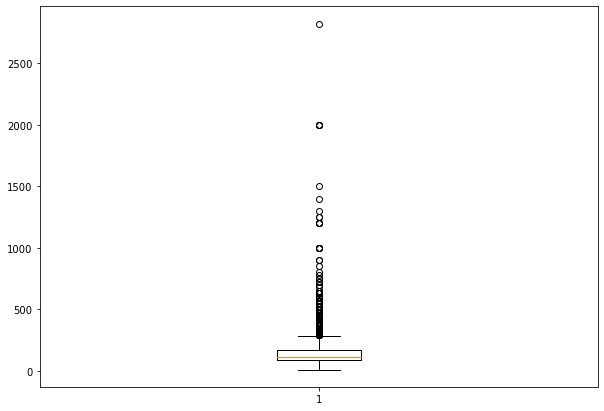

In [57]:
data = df3['price']
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.show()

From boxplot it seems like our dataset contains a lot of outliers. Let's try to understand is it realy outliers and can we drop them from our dataset.

We build a graphs that will show us the relationship between price and features.

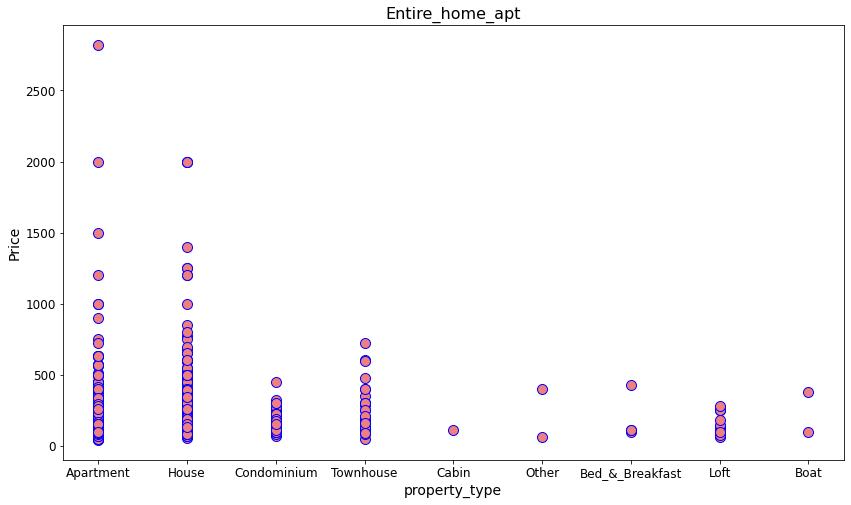

In [58]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Entire_home_apt', fontsize = 16)
    plt.xlabel('property_type', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.property_type, acc.price, color = 'lightcoral', edgecolor = 'b', s = 100)
    plt.savefig('Entire_home_apt_property_type.png')
    
plot_scatter_chart('Entire_home_apt')

#Entire_home_apt
#Private_room
#Shared_room

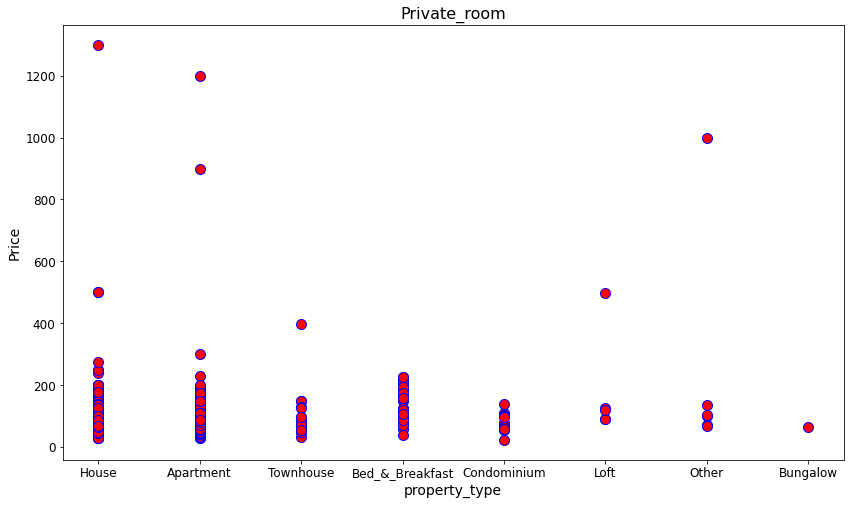

In [59]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Private_room', fontsize = 16)
    plt.xlabel('property_type', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.property_type, acc.price, color = 'red', edgecolor = 'b', s = 100)
    plt.savefig('Private_room_property_type.png')
    
plot_scatter_chart('Private_room')

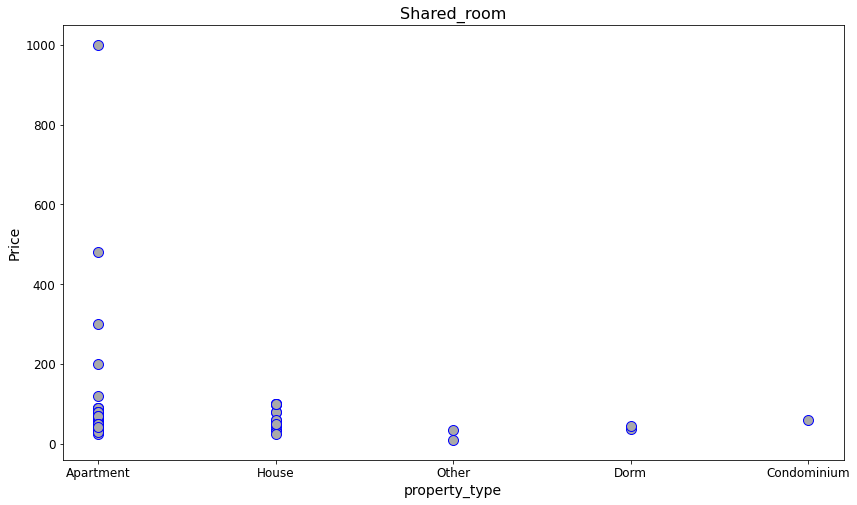

In [60]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Shared_room', fontsize = 16)
    plt.xlabel('property_type', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.property_type, acc.price, color = 'darkgrey', edgecolor = 'b', s = 100)
    plt.savefig('Shared_room_property_type.png')
    
plot_scatter_chart('Shared_room')

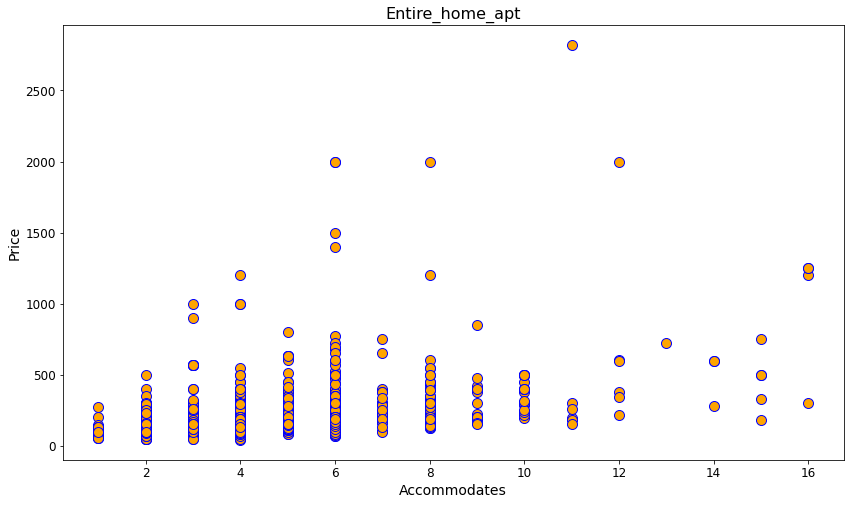

In [61]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Entire_home_apt', fontsize = 16)
    plt.xlabel('Accommodates', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.accommodates, acc.price, color = 'orange', edgecolor = 'b', s = 100)
    plt.savefig('Entire_home_apt_Accommodates.png')
    
plot_scatter_chart('Entire_home_apt')

#Entire_home_apt
#Private_room
#Shared_room 

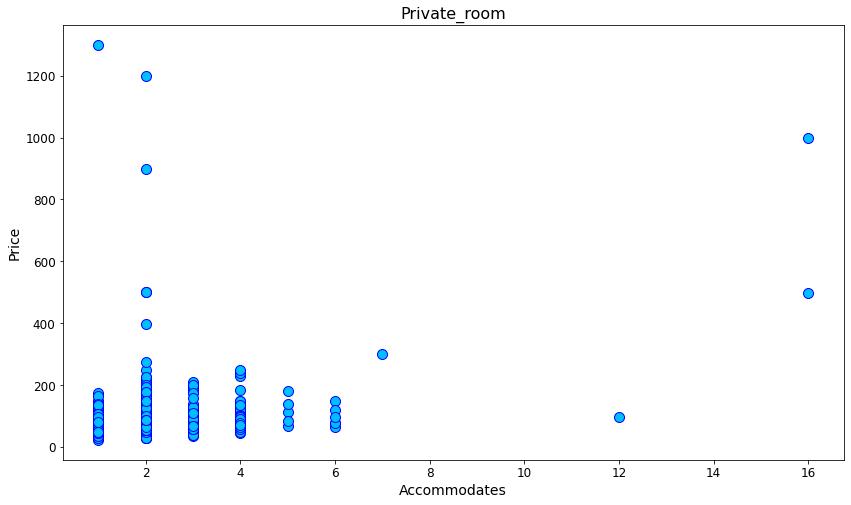

In [62]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Private_room', fontsize = 16)
    plt.xlabel('Accommodates', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.accommodates, acc.price, color = 'deepskyblue', edgecolor = 'b', s = 100)
    plt.savefig('Private_room_Accommodates.png')
    
plot_scatter_chart('Private_room')

#Entire_home_apt
#Private_room
#Shared_room 

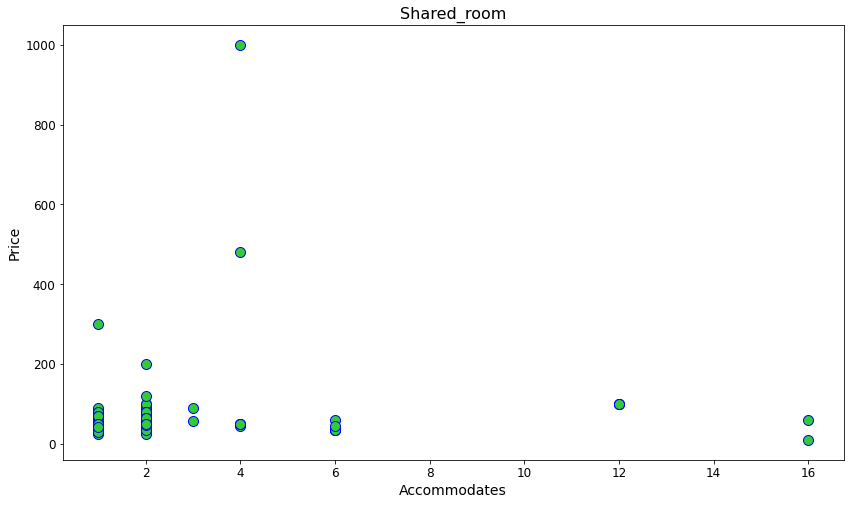

In [63]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Shared_room', fontsize = 16)
    plt.xlabel('Accommodates', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.accommodates, acc.price, color = 'limegreen', edgecolor = 'b', s = 100)
    plt.savefig('Shared_room_Accommodates.png')
    
plot_scatter_chart('Shared_room')

#Entire_home_apt
#Private_room
#Shared_room 

In [64]:
df_16 = df3.loc[df3['accommodates'] == 16]
df_16.to_csv("df_.csv", index=False)

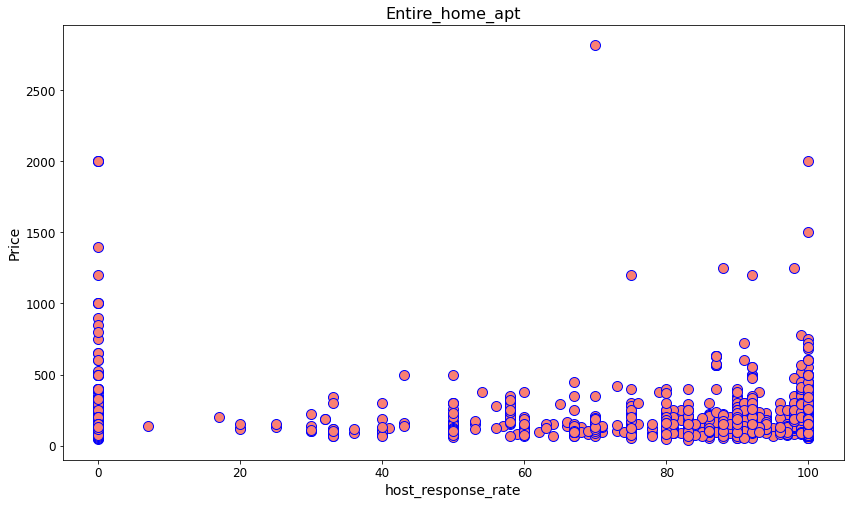

In [65]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Entire_home_apt', fontsize = 16)
    plt.xlabel('host_response_rate', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.host_response_rate, acc.price, color = 'salmon', edgecolor = 'b', s = 100)
    plt.savefig('Entire_home_apt_host_response_rate.png')
    
plot_scatter_chart('Entire_home_apt')

#Entire_home_apt
#Private_room
#Shared_room

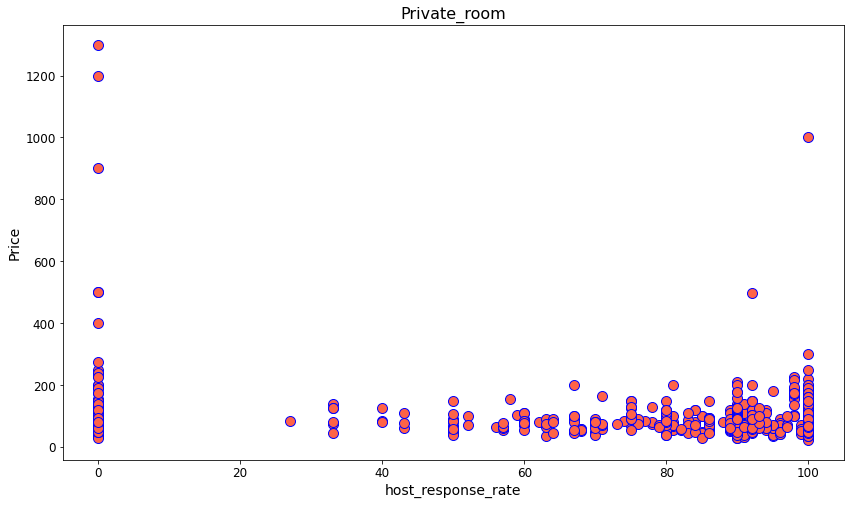

In [66]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Private_room', fontsize = 16)
    plt.xlabel('host_response_rate', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.host_response_rate, acc.price, color = 'tomato', edgecolor = 'b', s = 100)
    plt.savefig('Private_room_host_response_rate.png')
    
plot_scatter_chart('Private_room')

#Entire_home_apt
#Private_room
#Shared_room

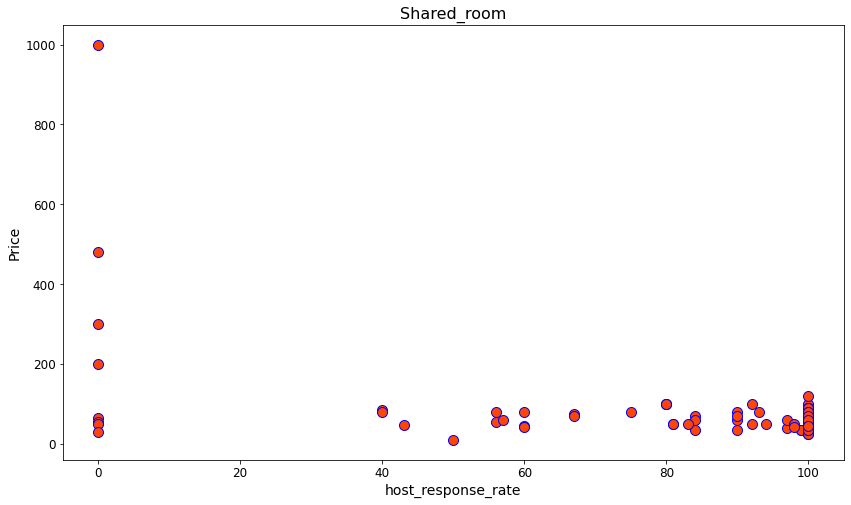

In [67]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Shared_room', fontsize = 16)
    plt.xlabel('host_response_rate', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.host_response_rate, acc.price, color = 'orangered', edgecolor = 'b', s = 100)
    plt.savefig('Shared_room_host_response_rate.png')
    
plot_scatter_chart('Shared_room')

#Entire_home_apt
#Private_room
#Shared_room

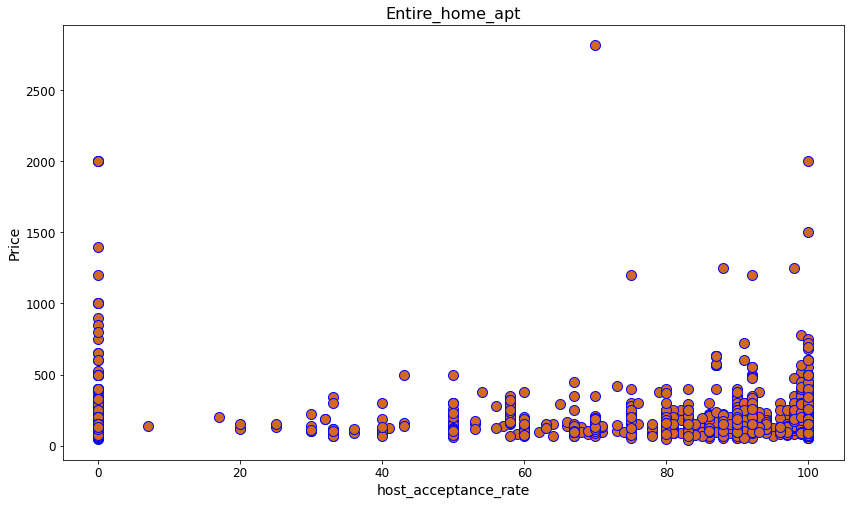

In [68]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Entire_home_apt', fontsize = 16)
    plt.xlabel('host_acceptance_rate', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.host_response_rate, acc.price, color = 'chocolate', edgecolor = 'b', s = 100)
    plt.savefig('Entire_home_apt_host_acceptance_rate.png')
    
plot_scatter_chart('Entire_home_apt')

#Entire_home_apt
#Private_room
#Shared_room

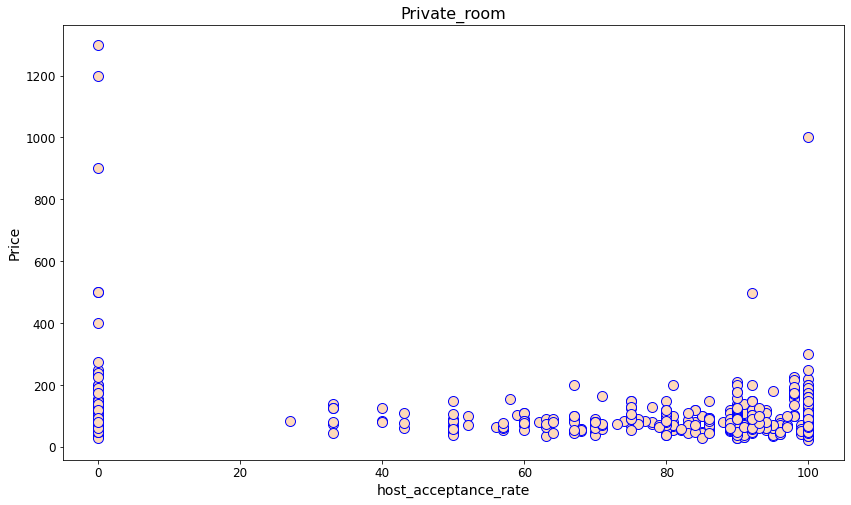

In [69]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Private_room', fontsize = 16)
    plt.xlabel('host_acceptance_rate', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.host_response_rate, acc.price, color = 'peachpuff', edgecolor = 'b', s = 100)
    plt.savefig('Private_room_host_acceptance_rate.png')
    
plot_scatter_chart('Private_room')

#Entire_home_apt
#Private_room
#Shared_room

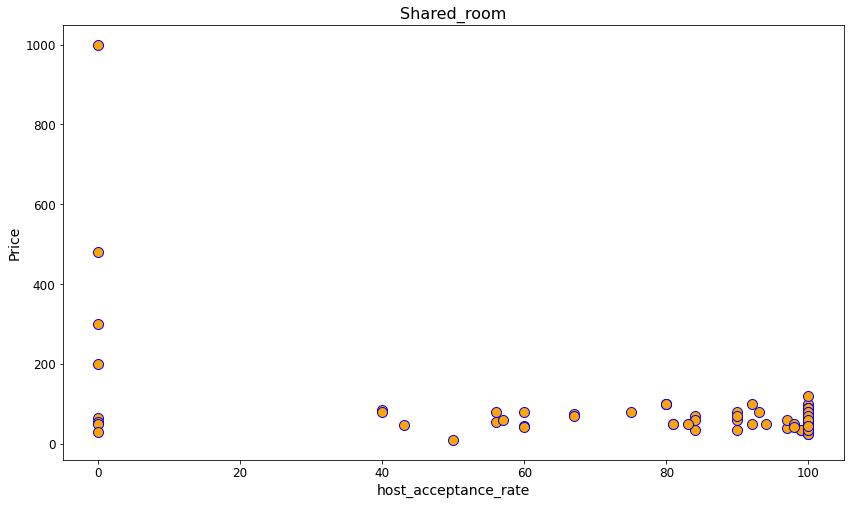

In [70]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Shared_room', fontsize = 16)
    plt.xlabel('host_acceptance_rate', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.host_response_rate, acc.price, color = 'orange', edgecolor = 'b', s = 100)
    plt.savefig('Private_room_host_acceptance_rate.png')
    
plot_scatter_chart('Shared_room')

#Entire_home_apt
#Private_room
#Shared_room

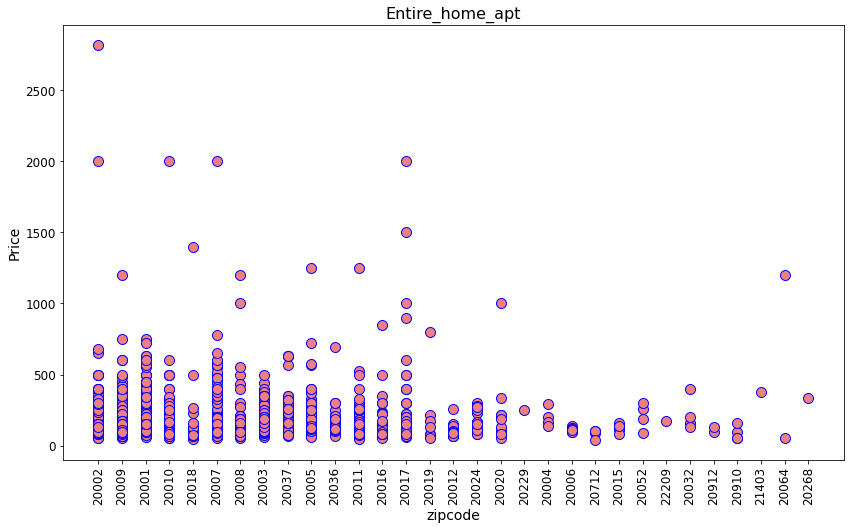

In [71]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Entire_home_apt', fontsize = 16)
    plt.xlabel('zipcode', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12, rotation='vertical')
    plt.yticks(fontsize = 12)
    plt.scatter(acc.zipcode, acc.price, color = 'lightcoral', edgecolor = 'b', s = 100)
    plt.savefig('Entire_home_apt_zipcode.png')
    
plot_scatter_chart('Entire_home_apt')

#Entire_home_apt
#Private_room
#Shared_room

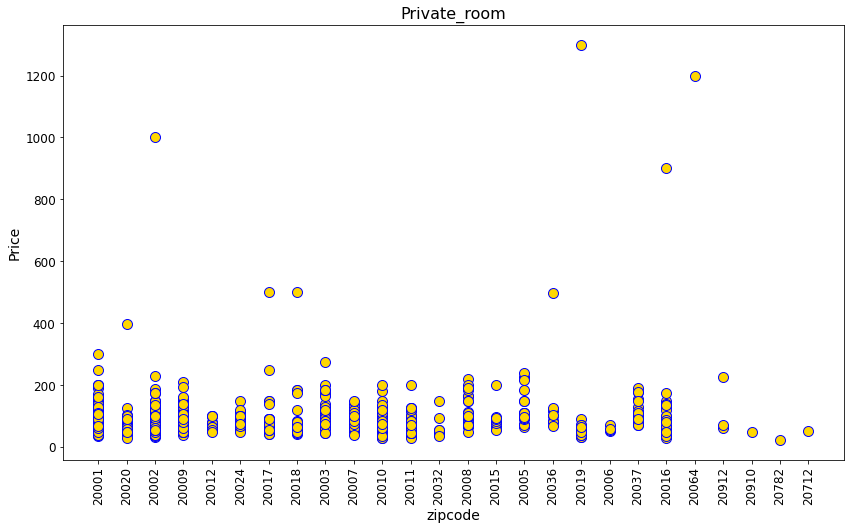

In [72]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Private_room', fontsize = 16)
    plt.xlabel('zipcode', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12, rotation='vertical')
    plt.yticks(fontsize = 12)
    plt.scatter(acc.zipcode, acc.price, color = 'gold', edgecolor = 'b', s = 100)
    plt.savefig('Private_room_zipcode.png')
    
plot_scatter_chart('Private_room')

#Entire_home_apt
#Private_room
#Shared_room

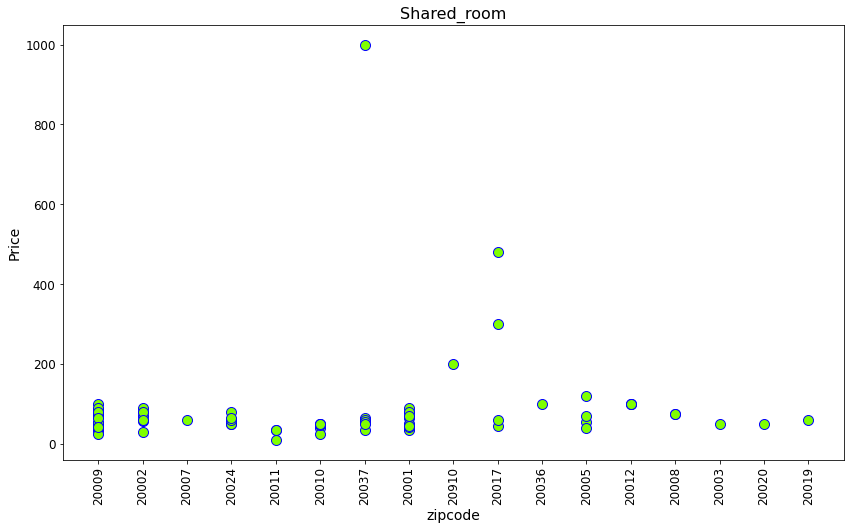

In [73]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Shared_room', fontsize = 16)
    plt.xlabel('zipcode', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12, rotation='vertical')
    plt.yticks(fontsize = 12)
    plt.scatter(acc.zipcode, acc.price, color = 'chartreuse', edgecolor = 'b', s = 100)
    plt.savefig('Shared_room_zipcode.png')
    
plot_scatter_chart('Shared_room')

#Entire_home_apt
#Private_room
#Shared_room

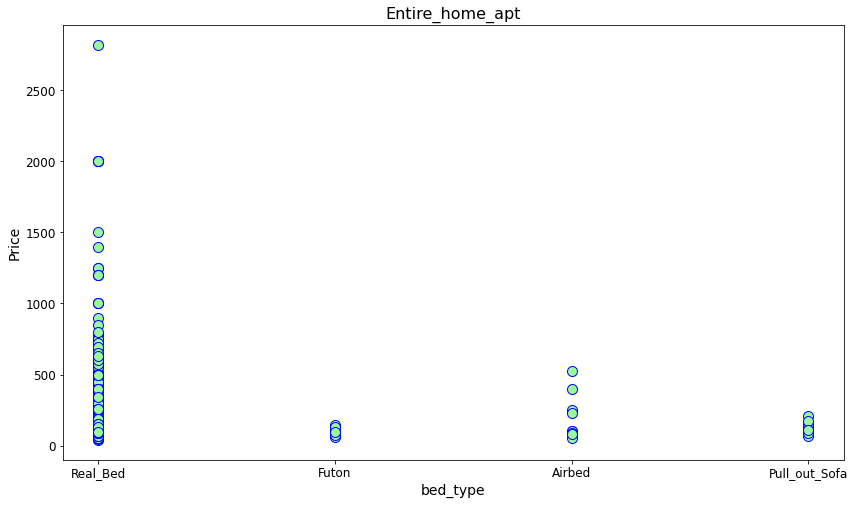

In [74]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Entire_home_apt', fontsize = 16)
    plt.xlabel('bed_type', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.bed_type, acc.price, color = 'palegreen', edgecolor = 'b', s = 100)
    plt.savefig('Entire_home_apt_bed_type.png')
    
plot_scatter_chart('Entire_home_apt')

#Entire_home_apt
#Private_room
#Shared_room

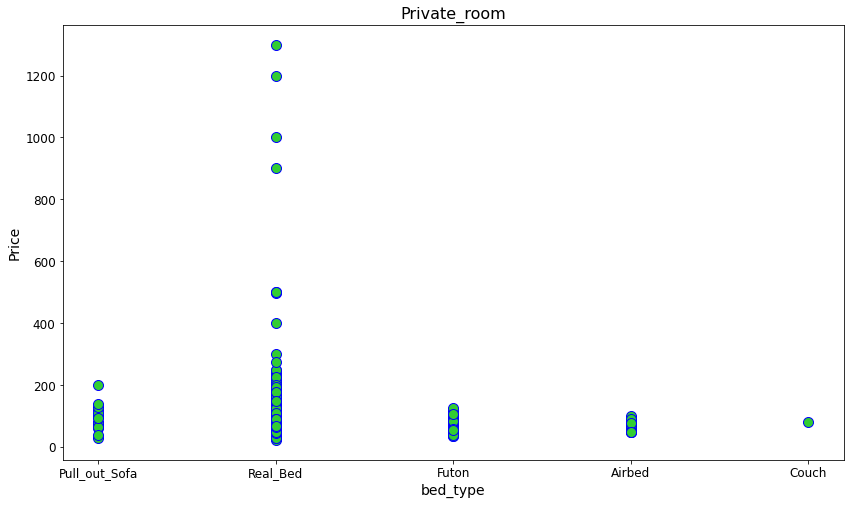

In [75]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Private_room', fontsize = 16)
    plt.xlabel('bed_type', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.bed_type, acc.price, color = 'limegreen', edgecolor = 'b', s = 100)
    plt.savefig('Private_room_bed_type.png')
    
plot_scatter_chart('Private_room')

#Entire_home_apt
#Private_room
#Shared_room

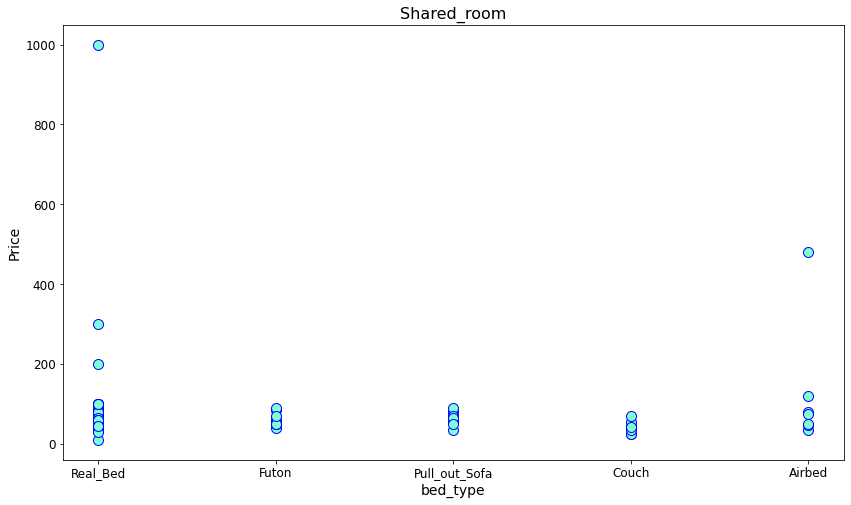

In [76]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Shared_room', fontsize = 16)
    plt.xlabel('bed_type', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.bed_type, acc.price, color = 'aquamarine', edgecolor = 'b', s = 100)
    plt.savefig('Shared_room_bed_type.png')
    
plot_scatter_chart('Shared_room')

#Entire_home_apt
#Private_room
#Shared_room

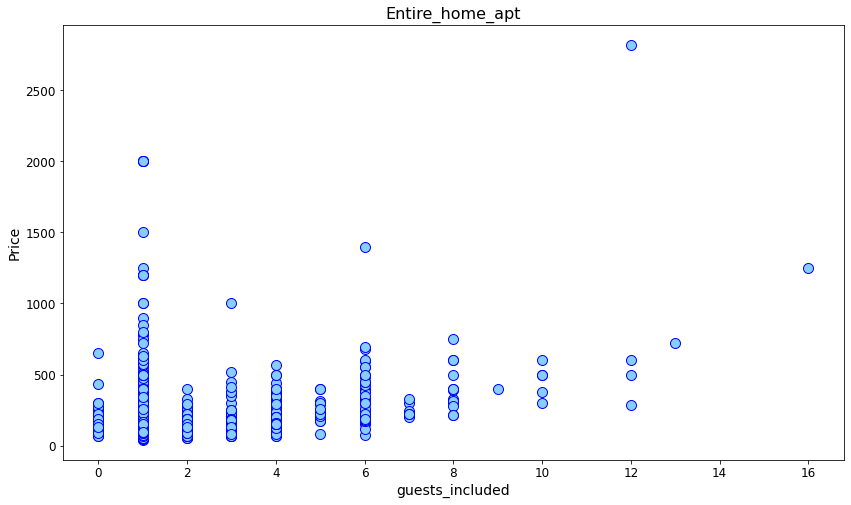

In [77]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Entire_home_apt', fontsize = 16)
    plt.xlabel('guests_included', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.guests_included, acc.price, color = 'lightskyblue', edgecolor = 'b', s = 100)
    plt.savefig('Entire_home_apt_guests_included.png')
    
plot_scatter_chart('Entire_home_apt')

#Entire_home_apt
#Private_room
#Shared_room

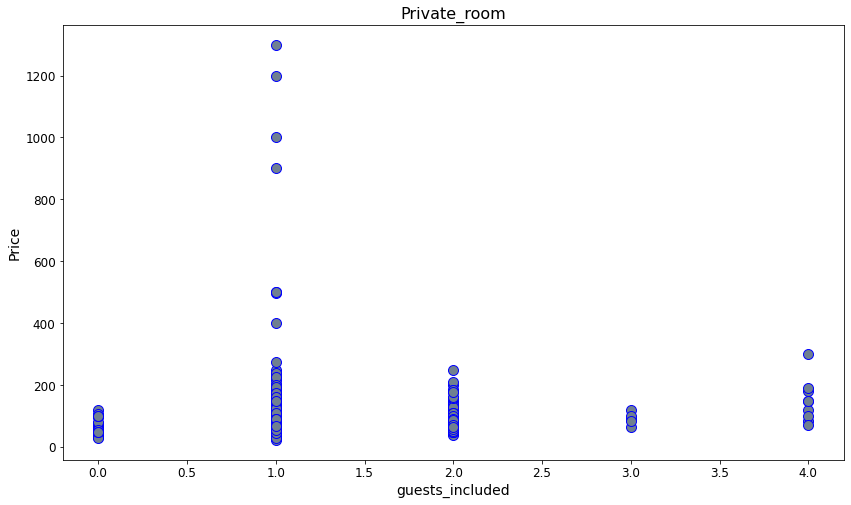

In [78]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Private_room', fontsize = 16)
    plt.xlabel('guests_included', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.guests_included, acc.price, color = 'slategray', edgecolor = 'b', s = 100)
    plt.savefig('Private_room_guests_included.png')
    
plot_scatter_chart('Private_room')

#Entire_home_apt
#Private_room
#Shared_room

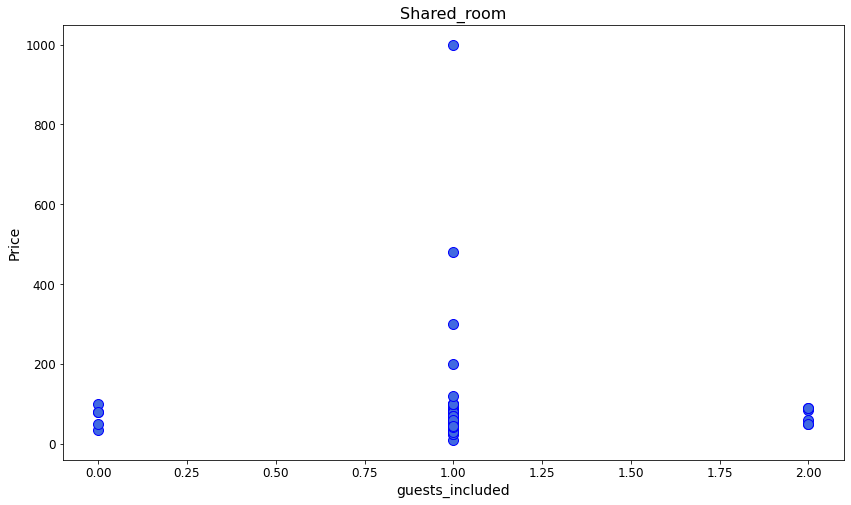

In [79]:
def plot_scatter_chart(room_type):
    
    acc = df3[(df3.room_type == room_type)]
    plt.figure(figsize=(14, 8))
    plt.title('Shared_room', fontsize = 16)
    plt.xlabel('guests_included', fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.scatter(acc.guests_included, acc.price, color = 'royalblue', edgecolor = 'b', s = 100)
    plt.savefig('Shared_room_guests_included.png')
    
plot_scatter_chart('Shared_room')

#Entire_home_apt
#Private_room
#Shared_room

***
#### I've been studying each graph and each case in detail and decide that there is no outliers in our dataset. Each proposal that looks like outlier has the same proposal with similar properties.

***

Some values in our dataset contain string data. I used the pandas function pd.get_dummies which can turn a categorical variable into a series of zeros and ones.

In [80]:
# Encode the categorical variables
df4 = pd.get_dummies(df3, columns=['zipcode', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'instant_bookable',
                                   'cancellation_policy', 'host_since_year'])
df4.to_csv("df4.csv", index=False)
df4.head(5)

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,...,cancellation_policy_strict,cancellation_policy_super_strict_30,host_since_year_2008,host_since_year_2009,host_since_year_2010,host_since_year_2011,host_since_year_2012,host_since_year_2013,host_since_year_2014,host_since_year_2015
0,98,52,4,1,195,0,2,3,90,2,...,1,0,0,0,0,0,0,1,0,0
1,100,100,2,1,150,50,2,2,1125,2,...,1,0,0,0,0,0,1,0,0,0
2,97,100,6,1,140,75,4,4,90,53,...,1,0,0,1,0,0,0,0,0,0
3,92,100,3,1,110,35,0,2,1125,32,...,0,0,0,0,0,0,0,1,0,0
4,100,75,2,1,119,50,0,4,14,3,...,0,0,0,0,0,0,1,0,0,0


***
Move 'price' column to the end of dataset.

In [81]:
last_column = df4.pop('price')
pos = len(df4.columns)
df4.insert(pos, 'price', last_column, allow_duplicates = False)
df4.to_csv("df4_price.csv", index=False)

***
Convert all values to integer type.

In [82]:
df4 = df4.astype('int64')
print(df4.dtypes)

host_response_rate      int64
host_acceptance_rate    int64
accommodates            int64
bathrooms               int64
cleaning_fee            int64
                        ...  
host_since_year_2012    int64
host_since_year_2013    int64
host_since_year_2014    int64
host_since_year_2015    int64
price                   int64
Length: 117, dtype: object


# Choose an algorithm

## LOOCV algorithm selection

In [50]:
from numpy import mean
from numpy import absolute

from sklearn.linear_model import LinearRegression # Linear Regression algorithm
from sklearn.ensemble import RandomForestRegressor # Random Forest for Regression algorithm 
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting algorithm

from sklearn.metrics import mean_absolute_error # MAE evaluation metric

from sklearn.model_selection import LeaveOneOut # Leave-One-Out cross-validator
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation

data = df4.values

# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]

# create loocv procedure
cv = LeaveOneOut()

# create models
LR_model = LinearRegression()
RFR_model = RandomForestRegressor(random_state=1)
GBR_model = GradientBoostingRegressor()

# evaluate model
LR_scores = cross_val_score(LR_model, X, y, scoring='neg_mean_absolute_error', cv=cv)
RFR_scores = cross_val_score(RFR_model, X, y, scoring='neg_mean_absolute_error', cv=cv)
GBR_scores = cross_val_score(GBR_model, X, y, scoring='neg_mean_absolute_error', cv=cv)

# force positive
LR_scores = absolute(LR_scores)
RFR_scores = absolute(RFR_scores)
GBR_scores = absolute(GBR_scores)

# report performance
print('Linear Regression algorithm Mean Absolute Error: $%0.2f' % (mean(LR_scores)))
print('Random Forest for Regression algorithm Mean Absolute Error: $%0.2f' % (mean(RFR_scores)))
print('Gradient Boosting for Regression algorithm Mean Absolute Error: $%0.2f' % (mean(GBR_scores)))

Linear Regression algorithm Mean Absolute Error: $65.25
Random Forest for Regression algorithm Mean Absolute Error: $46.76
Gradient Boosting for Regression algorithm Mean Absolute Error: $47.68


***
As we can see Random Forest for Regression algorithm gives the best result.

Let's find best Random Forest Regressor parameters.

## Random Search with Cross Validation


In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from pprint import pprint

# Create Training and Testing Sets
X_var = df4.drop('price', axis = 'columns')
y_var = df4.price

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, train_size=0.9, random_state=5)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [87]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
RFR = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
RFR_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

# Fit the random search model
RFR_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 1.1min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 1.1min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 1.1min
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  30.3s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  30.6s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  30.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_es

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [88]:
RFR_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

#### Evaluate the Default Model

In [89]:
base_model = RandomForestRegressor(random_state = 42)
base_model.fit(X_train, y_train)
base_model_yhat = base_model.predict(X_test)
print('Random Forest for Regression algorithm Mean Absolute Error: $%0.2f' % (mean_absolute_error(y_test, base_model_yhat)))

Random Forest for Regression algorithm Mean Absolute Error: $50.47


#### Evaluate the Best Random Search Model

In [90]:
best_random = RFR_random.best_estimator_
best_random_yhat = best_random.predict(X_test)
print('Random Forest for Regression algorithm Mean Absolute Error: $%0.2f' % (mean_absolute_error(y_test, best_random_yhat)))

Random Forest for Regression algorithm Mean Absolute Error: $50.63


# Grid Search with Cross Validation
We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [91]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [1600, 1800, 2000]
}

# Create a base model
RFR = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFR, param_grid = param_grid, 
                          cv = 3, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1600; total time=   1.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1800; total time=   1.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1800; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1800; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1600; total time=  26.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1600; total time=  24.7s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1600; total time=  29.8s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1800; total time=  29.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1800; total time=  26.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1800; total time=  27.1s
[CV] END bootstrap=True, max_depth=80, ma

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=2000; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  22.2s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  22.3s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  21.6s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  24.4s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  24.8s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  24.7s
[CV] END bootstrap=True, max_depth=80, ma

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=2000; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1600; total time=  20.1s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1600; total time=  20.1s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1600; total time=  20.7s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1800; total time=  23.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1800; total time=  22.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1800; total time=  23.1s
[CV] END bootstrap=True, max_depth=80, ma

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1800; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1600; total time=  23.5s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1600; total time=  23.5s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1600; total time=  23.7s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1800; total time=  26.4s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1800; total time=  26.8s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1800; total time=  27.2s
[CV] END bootstrap=True, max_depth=90, ma

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1800; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1800; total time=   1.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=2000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  21.4s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  21.6s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  22.9s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  25.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  24.5s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  24.2s
[CV] END bootstrap=True, max_depth=90, ma

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=2000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1600; total time=  20.5s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1600; total time=  20.3s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1600; total time=  20.3s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1800; total time=  22.6s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1800; total time=  23.4s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1800; total time=  23.2s
[CV] END bootstrap=True, max_depth=90, ma

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   1.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1600; total time=  23.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1600; total time=  23.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1600; total time=  24.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1800; total time=  26.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1800; total time=  26.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1800; total time=  27.9s
[CV] END bootstrap=True, max_depth

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=2000; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  21.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  21.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  22.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  24.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  24.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  24.4s
[CV] END bootstrap=True, max_depth

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1800; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=1800; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=2000; total time=   0.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=2000; total time=   1.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=2000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1600; total time=  24.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1600; total time=  20.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1600; total time=  23.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1800; total time=  26.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1800; total time=  25.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1800; total time=  26.5s
[CV] END bootstrap=True, max_depth

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.39993538 0.40403011 0.40309648
 0.40175111 0.39968009 0.40065245        nan        nan        nan
 0.39506784 0.3969291  0.39588219 0.39428543 0.39290386 0.39609467
        nan        nan        nan 0.39800016 0.39756876 0.39813045
 0.39673842 0.39732652 0.39574714        nan        nan        nan
 0.40195208 0.40185463 0.40214496 0.40046081 0.40096927 0.40341781
        nan        nan        nan 0.39893464 0.39510539 0.3933959
 0.39457101 0.39331787 0.39671508        nan        nan        nan
 0.39968413 0.39811083 0.39887361 0.39762952 0.397695   0.39850765
        nan        nan        nan 0.39942097 0.39967427 0.40306695
 0.40324758 0.3997718  0.39778729        nan        nan        nan
 0.39495568 0.39406944 0.39521635 0.39569778 0.39740122 0.39398636
        nan        nan        nan 0.39846309 0.3972765

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': ['auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [1600, 1800, 2000]},
             verbose=2)

So best paremetrs for Random Forest Regressor algorithm are:

In [92]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 1800}

#### Evaluate the Best Model from Grid Search

In [93]:
best_grid = grid_search.best_estimator_
best_grid_yhat = best_grid.predict(X_test)
print('Random Forest for Regression algorithm Mean Absolute Error: $%0.2f' % (mean_absolute_error(y_test, best_grid_yhat)))

Random Forest for Regression algorithm Mean Absolute Error: $50.22


# Load in Data for price predict

***
Now we import the Submission.csv dataset for accommodation price prediction. We will take the same columns from Submission.csv as with Train.csv dataset our model is trained in.

In [152]:
data_sub = pd.read_csv('Submission.csv')
df_sub = pd.DataFrame(data_sub)

df_sub.head(5)

,name,summary,description,neighborhood_overview,transit,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,Top Location 1 block to Capitol,Location is unbeatable. One block to US Capi...,Location is unbeatable. One block to US Capi...,Outstanding security. Charming historic villa...,NaN,2013-11-27,Austin / DC / Cape Cod,Long time provider of furnished housing. W...,98%,79%,...,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,5,1.00
1,Charming Basement Apartment in DC,This fully furnished basement apartment can be...,This fully furnished basement apartment can be...,"Diverse neighborhood, steps from bars, restaur...","Metro is a 5 min walk, as well as direct bus ...",2015-04-05,"Washington, District of Columbia, United States","Hey there! New to the airbnb community, living...",89%,33%,...,10.0,10.0,10.0,10.0,9.0,9.0,f,flexible,1,0.36
2,Cozy Apartment to Explore DC,"Convenient, newly renovated 1 bedroom/1 bathro...","Convenient, newly renovated 1 bedroom/1 bathro...",Petworth is an interesting and historic DC nei...,We have a number of bus and train lines within...,2013-05-22,"Washington, District of Columbia, United States","I am a doctoral student in Washington, DC. I ...",100%,91%,...,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,1,4.00
3,Walk Everywhere! 3 Beds - 2 BR,Location! You're right on 14th street in Logan...,Location! You're right on 14th street in Logan...,Whole Foods and Trader Joe are both close. CV...,Parking is sometimes available for an extra $1...,2012-01-23,US,I grew up in the DC area and I love it here!\n...,100%,63%,...,10.0,9.0,10.0,10.0,10.0,9.0,f,strict,2,2.32
4,"Luxurious Apartment, Heart of DC",Satisfaction Guaranteed! If you are not satis...,Satisfaction Guaranteed! If you are not satis...,"1 block from 14th Street, DC's best location a...",3 blocks from the Metro and a 15 minute walk f...,2013-06-20,"Washington, District of Columbia, United States",Hey there - I'm Adam and I moved to Washington...,100%,99%,...,10.0,9.0,9.0,10.0,10.0,9.0,f,moderate,4,5.23


In [153]:
len(df_sub.index)

618

In [154]:
df_sub_1 = df_sub.drop(columns= ['name', 'summary', 'description', 'neighborhood_overview', 'transit', 'host_location', 'host_about', 'host_neighbourhood', 'host_verifications', 
'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'amenities'])
df_sub_1.head(5)

,host_since,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,2013-11-27,98%,79%,"Capitol Hill, Lincoln Park",20002,Apartment,Entire home/apt,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,5,1.00
1,2015-04-05,89%,33%,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",20010,Apartment,Entire home/apt,2,1.0,1.0,...,10.0,10.0,10.0,10.0,9.0,9.0,f,flexible,1,0.36
2,2013-05-22,100%,91%,"Brightwood Park, Crestwood, Petworth",20011,Apartment,Entire home/apt,2,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,1,4.00
3,2012-01-23,100%,63%,"Shaw, Logan Circle",20005,Apartment,Entire home/apt,5,1.0,2.0,...,10.0,9.0,10.0,10.0,10.0,9.0,f,strict,2,2.32
4,2013-06-20,100%,99%,"Downtown, Chinatown, Penn Quarters, Mount Vern...",20005,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,9.0,9.0,10.0,10.0,9.0,f,moderate,4,5.23


In [155]:
df_sub_1['host_since'] = pd.to_datetime(df_sub_1['host_since'])
df_sub_1['host_since_year'] = df_sub_1['host_since'].dt.year
df_sub_1 = df_sub_1.drop(columns = ['host_since'])
df_sub_1.head(5)

,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_since_year
0,98%,79%,"Capitol Hill, Lincoln Park",20002,Apartment,Entire home/apt,2,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,f,strict,5,1.00,2013
1,89%,33%,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",20010,Apartment,Entire home/apt,2,1.0,1.0,1.0,...,10.0,10.0,10.0,9.0,9.0,f,flexible,1,0.36,2015
2,100%,91%,"Brightwood Park, Crestwood, Petworth",20011,Apartment,Entire home/apt,2,1.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,f,moderate,1,4.00,2013
3,100%,63%,"Shaw, Logan Circle",20005,Apartment,Entire home/apt,5,1.0,2.0,3.0,...,9.0,10.0,10.0,10.0,9.0,f,strict,2,2.32,2012
4,100%,99%,"Downtown, Chinatown, Penn Quarters, Mount Vern...",20005,Apartment,Entire home/apt,4,1.0,1.0,2.0,...,9.0,9.0,10.0,10.0,9.0,f,moderate,4,5.23,2013


In [156]:
df_sub_1['neighbourhood_cleansed'].value_counts()

Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                           77
Dupont Circle, Connecticut Avenue/K Street                                                           60
Capitol Hill, Lincoln Park                                                                           56
Shaw, Logan Circle                                                                                   53
Edgewood, Bloomingdale, Truxton Circle, Eckington                                                    44
Kalorama Heights, Adams Morgan, Lanier Heights                                                       37
Union Station, Stanton Park, Kingman Park                                                            36
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street                        30
Brightwood Park, Crestwood, Petworth                                                                 29
Howard University, Le Droit Park, Cardozo/Shaw                  

In [157]:
df_sub_1['neighbourhood_cleansed'] = df_sub_1['neighbourhood_cleansed'].str.replace("\ |\/","_", regex=True)
df_sub_1['neighbourhood_cleansed'] = df_sub_1['neighbourhood_cleansed'].str.replace("\.|\,","",  regex=True)

df_sub_1['neighbourhood_cleansed'].value_counts()

Columbia_Heights_Mt_Pleasant_Pleasant_Plains_Park_View                                          77
Dupont_Circle_Connecticut_Avenue_K_Street                                                       60
Capitol_Hill_Lincoln_Park                                                                       56
Shaw_Logan_Circle                                                                               53
Edgewood_Bloomingdale_Truxton_Circle_Eckington                                                  44
Kalorama_Heights_Adams_Morgan_Lanier_Heights                                                    37
Union_Station_Stanton_Park_Kingman_Park                                                         36
Downtown_Chinatown_Penn_Quarters_Mount_Vernon_Square_North_Capitol_Street                       30
Brightwood_Park_Crestwood_Petworth                                                              29
Howard_University_Le_Droit_Park_Cardozo_Shaw                                                    21
Georgetown

In [158]:
df_sub_1['property_type'].value_counts()

Apartment          358
House              222
Condominium         15
Bed & Breakfast     11
Townhouse            8
Loft                 4
Name: property_type, dtype: int64

In [159]:
df_sub_1['property_type'] = df_sub_1['property_type'].str.replace(" ","_")
df_sub_1['property_type'].value_counts()

Apartment          358
House              222
Condominium         15
Bed_&_Breakfast     11
Townhouse            8
Loft                 4
Name: property_type, dtype: int64

In [160]:
df_sub_1['room_type'].value_counts()

Entire home/apt    394
Private room       208
Shared room         16
Name: room_type, dtype: int64

In [161]:
df_sub_1['room_type'] = df_sub_1['room_type'].str.replace("\ |\/","_", regex=True)
df_sub_1['room_type'].value_counts()

Entire_home_apt    394
Private_room       208
Shared_room         16
Name: room_type, dtype: int64

In [162]:
df_sub_1['bed_type'].value_counts()

Real Bed         593
Pull-out Sofa     11
Futon              6
Airbed             4
Couch              4
Name: bed_type, dtype: int64

In [163]:
df_sub_1['bed_type'] = df_sub_1['bed_type'].str.replace("\ |\-","_", regex=True)
df_sub_1['bed_type'].value_counts()

Real_Bed         593
Pull_out_Sofa     11
Futon              6
Couch              4
Airbed             4
Name: bed_type, dtype: int64

In [164]:
df_sub_1['instant_bookable'].value_counts()

f    552
t     66
Name: instant_bookable, dtype: int64

In [165]:
df_sub_1['cancellation_policy'].value_counts()

flexible           246
strict             185
moderate           178
super_strict_30      9
Name: cancellation_policy, dtype: int64

In [166]:
df_sub_1['host_response_rate'] = df_sub_1['host_response_rate'].str.replace("%","", regex=True)
df_sub_1['host_acceptance_rate'] = df_sub_1['host_acceptance_rate'].str.replace("%","", regex=True)
df_sub_1['cleaning_fee'] = df_sub_1['cleaning_fee'].str.replace("$","", regex=True)

In [167]:
print(df_sub_1.isnull().sum())

host_response_rate                 72
host_acceptance_rate              106
neighbourhood_cleansed              0
zipcode                             1
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           2
bedrooms                            2
beds                                0
bed_type                            0
cleaning_fee                      233
guests_included                     0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating              152
review_scores_accuracy            156
review_scores_cleanliness         156
review_scores_checkin             156
review_scores_communication       155
review_scores_location            155
review_scores_value               155
instant_bookable                    0
cancellation_policy                 0
calculated_host_listings_count      0
reviews_per_

In [168]:
df_sub_1 = df_sub_1.fillna(value={'zipcode': 0, 'host_response_rate': 0, 'host_acceptance_rate': 0, 'bathrooms': 0, 'bedrooms': 0, 'beds': 0, 'cleaning_fee': 0, 'review_scores_rating': 0, 'review_scores_accuracy': 0, 'review_scores_cleanliness': 0, 'review_scores_checkin': 0, 'review_scores_communication': 0, 'review_scores_location': 0, 'review_scores_value': 0, 'reviews_per_month': 0})

print(df_sub_1.isnull().sum())

host_response_rate                0
host_acceptance_rate              0
neighbourhood_cleansed            0
zipcode                           0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
cleaning_fee                      0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
instant_bookable                  0
cancellation_policy               0
calculated_host_listings_count    0
reviews_per_month                 0
host_since_year             

In [169]:
df_sub_1['zipcode'].value_counts()

20009         98
20001         88
20002         70
20010         56
20003         50
20011         41
20005         34
20007         31
20008         21
20037         20
20017         20
20016         14
20036         12
20024         11
20019          9
20020          9
20012          8
20018          6
20015          5
20006          4
20032          3
20910          2
20782          1
20912          1
20003-3021     1
20815          1
20743          1
0              1
Name: zipcode, dtype: int64

In [170]:
df_sub_1.zipcode = df_sub_1.zipcode.replace('20003-3021', '20003')
df_sub_1['zipcode'].value_counts()

20009    98
20001    88
20002    70
20010    56
20003    51
20011    41
20005    34
20007    31
20008    21
20017    20
20037    20
20016    14
20036    12
20024    11
20019     9
20020     9
20012     8
20018     6
20015     5
20006     4
20032     3
20910     2
20782     1
20912     1
20815     1
20743     1
0         1
Name: zipcode, dtype: int64

In [171]:
print(df_sub_1.dtypes)

host_response_rate                 object
host_acceptance_rate               object
neighbourhood_cleansed             object
zipcode                            object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
cleaning_fee                       object
guests_included                     int64
minimum_nights                      int64
maximum_nights                      int64
number_of_reviews                   int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
instant_bookable                  

In [172]:
cols = ['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
df_sub_1[cols] = df_sub_1[cols].apply(pd.to_numeric, errors='coerce')
df_sub_1[cols] = df_sub_1[cols].astype('int64')

print(df_sub_1.dtypes)

host_response_rate                 int64
host_acceptance_rate               int64
neighbourhood_cleansed            object
zipcode                           object
property_type                     object
room_type                         object
accommodates                       int64
bathrooms                          int64
bedrooms                           int64
beds                               int64
bed_type                          object
cleaning_fee                       int64
guests_included                    int64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
review_scores_rating               int64
review_scores_accuracy             int64
review_scores_cleanliness          int64
review_scores_checkin              int64
review_scores_communication        int64
review_scores_location             int64
review_scores_value                int64
instant_bookable                  object
cancellation_pol

In [173]:
df_sub_2 = df_sub_1.drop(columns=['bedrooms', 'beds', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])

In [174]:
#Encode the categorical variables
df_sub_3 = pd.get_dummies(df_sub_2, columns=['zipcode', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'instant_bookable',
                                   'cancellation_policy', 'host_since_year'])
df_sub_3.head(5)

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,...,cancellation_policy_strict,cancellation_policy_super_strict_30,host_since_year_2008,host_since_year_2009,host_since_year_2010,host_since_year_2011,host_since_year_2012,host_since_year_2013,host_since_year_2014,host_since_year_2015
0,98,79,2,1,75,2,3,1125,1,80,...,1,0,0,0,0,0,0,1,0,0
1,89,33,2,1,0,1,1,3,2,100,...,0,0,0,0,0,0,0,0,0,1
2,100,91,2,1,60,2,2,1125,10,98,...,0,0,0,0,0,0,0,1,0,0
3,100,63,5,1,69,4,2,40,11,95,...,1,0,0,0,0,0,1,0,0,0
4,100,99,4,1,35,2,1,1125,136,93,...,0,0,0,0,0,0,0,1,0,0


In [175]:
print(df_sub_3.dtypes)

host_response_rate      int64
host_acceptance_rate    int64
accommodates            int64
bathrooms               int64
cleaning_fee            int64
                        ...  
host_since_year_2011    uint8
host_since_year_2012    uint8
host_since_year_2013    uint8
host_since_year_2014    uint8
host_since_year_2015    uint8
Length: 104, dtype: object


In [176]:
df_sub_3 = df_sub_3.apply(pd.to_numeric)
df_sub_3 = df_sub_3.astype('int64')

print(df_sub_3.dtypes)

host_response_rate      int64
host_acceptance_rate    int64
accommodates            int64
bathrooms               int64
cleaning_fee            int64
                        ...  
host_since_year_2011    int64
host_since_year_2012    int64
host_since_year_2013    int64
host_since_year_2014    int64
host_since_year_2015    int64
Length: 104, dtype: object


In [180]:
df4.to_csv("df4_compare_1.csv", index=False)
df_sub_3.to_csv("df_sub_3_compare_1.csv", index=False)

In [181]:
df_sub_4 = df_sub_3.assign(zipcode_20004=0, zipcode_20052=0, zipcode_20064=0, zipcode_20229=0, zipcode_20268=0, zipcode_20712=0, 
                 zipcode_21403=0, zipcode_22209=0, neighbourhood_cleansed_Fairfax_Village_Naylor_Gardens_Hillcrest_Summit_Park=0,
                 neighbourhood_cleansed_Woodland_Fort_Stanton_Garfield_Heights_Knox_Hill=0, property_type_Boat=0,
                 property_type_Bungalow=0, property_type_Cabin=0, property_type_Dorm=0, property_type_Other=0)
df_sub_4.head(5)

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,...,zipcode_20712,zipcode_21403,zipcode_22209,neighbourhood_cleansed_Fairfax_Village_Naylor_Gardens_Hillcrest_Summit_Park,neighbourhood_cleansed_Woodland_Fort_Stanton_Garfield_Heights_Knox_Hill,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Dorm,property_type_Other
0,98,79,2,1,75,2,3,1125,1,80,...,0,0,0,0,0,0,0,0,0,0
1,89,33,2,1,0,1,1,3,2,100,...,0,0,0,0,0,0,0,0,0,0
2,100,91,2,1,60,2,2,1125,10,98,...,0,0,0,0,0,0,0,0,0,0
3,100,63,5,1,69,4,2,40,11,95,...,0,0,0,0,0,0,0,0,0,0
4,100,99,4,1,35,2,1,1125,136,93,...,0,0,0,0,0,0,0,0,0,0


In [182]:
df5 = df4.assign(zipcode_0=0, zipcode_20743=0, zipcode_20815=0)
df5.head(5)

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,...,host_since_year_2010,host_since_year_2011,host_since_year_2012,host_since_year_2013,host_since_year_2014,host_since_year_2015,price,zipcode_0,zipcode_20743,zipcode_20815
0,98,52,4,1,0,2,3,90,2,90,...,0,0,0,1,0,0,195,0,0,0
1,100,100,2,1,50,2,2,1125,2,90,...,0,0,1,0,0,0,150,0,0,0
2,97,100,6,1,75,4,4,90,53,83,...,0,0,0,0,0,0,140,0,0,0
3,92,100,3,1,35,0,2,1125,32,84,...,0,0,0,1,0,0,110,0,0,0
4,100,75,2,1,50,0,4,14,3,90,...,0,0,1,0,0,0,119,0,0,0


## Train Model

In [183]:
X_var = df5.drop('price', axis = 'columns')
y_var = df5.price

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, train_size=0.9, random_state=5)

RFR_algorithm = RandomForestRegressor(bootstrap=True, max_depth=80, max_features='auto', min_samples_leaf=3, min_samples_split=2, n_estimators=1800, random_state=42)

RFR_algorithm.fit(X_train, y_train)
RFR_algorithm_yhat = RFR_algorithm.predict(X_test)

print('Mean Absolute Error: $%0.2f' % (mean_absolute_error(y_test, RFR_algorithm_yhat)))

Mean Absolute Error: $50.53


## Predict the prices

Our dataset is ready to price prediction. Calculate prices for proposals from Submission.csv dataset, create in dataset column Price and put an appropriate value.

In [186]:
RFR_algorithm_yhat_pred = RFR_algorithm.predict(df_sub_4)
data_sub_priced = pd.read_csv('Submission.csv')
df_sub_priced = pd.DataFrame(data_sub_priced)
df_sub_priced = df_sub_priced.assign(price = RFR_algorithm_yhat_pred)
df_sub_priced.to_csv("Submission_priced.csv", index=False)

### Using our model, homeowners can instantly determine the minimum rental price at which their supply is guaranteed to be in demand.

Here is top 10 features which has a major contribution in forecasting accommodates prices.

<AxesSubplot:>

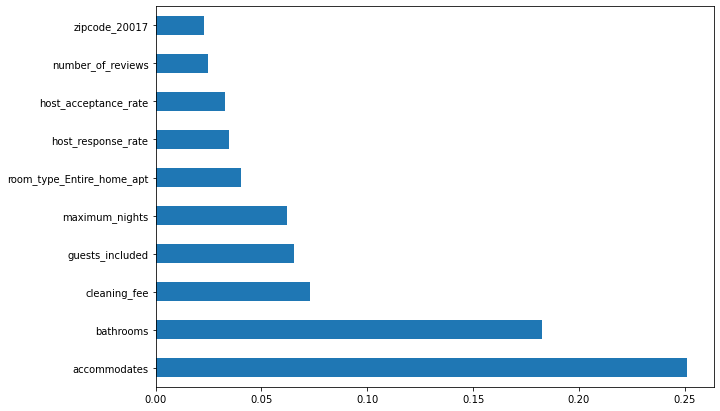

In [188]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(RFR_algorithm.feature_importances_, index = X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')